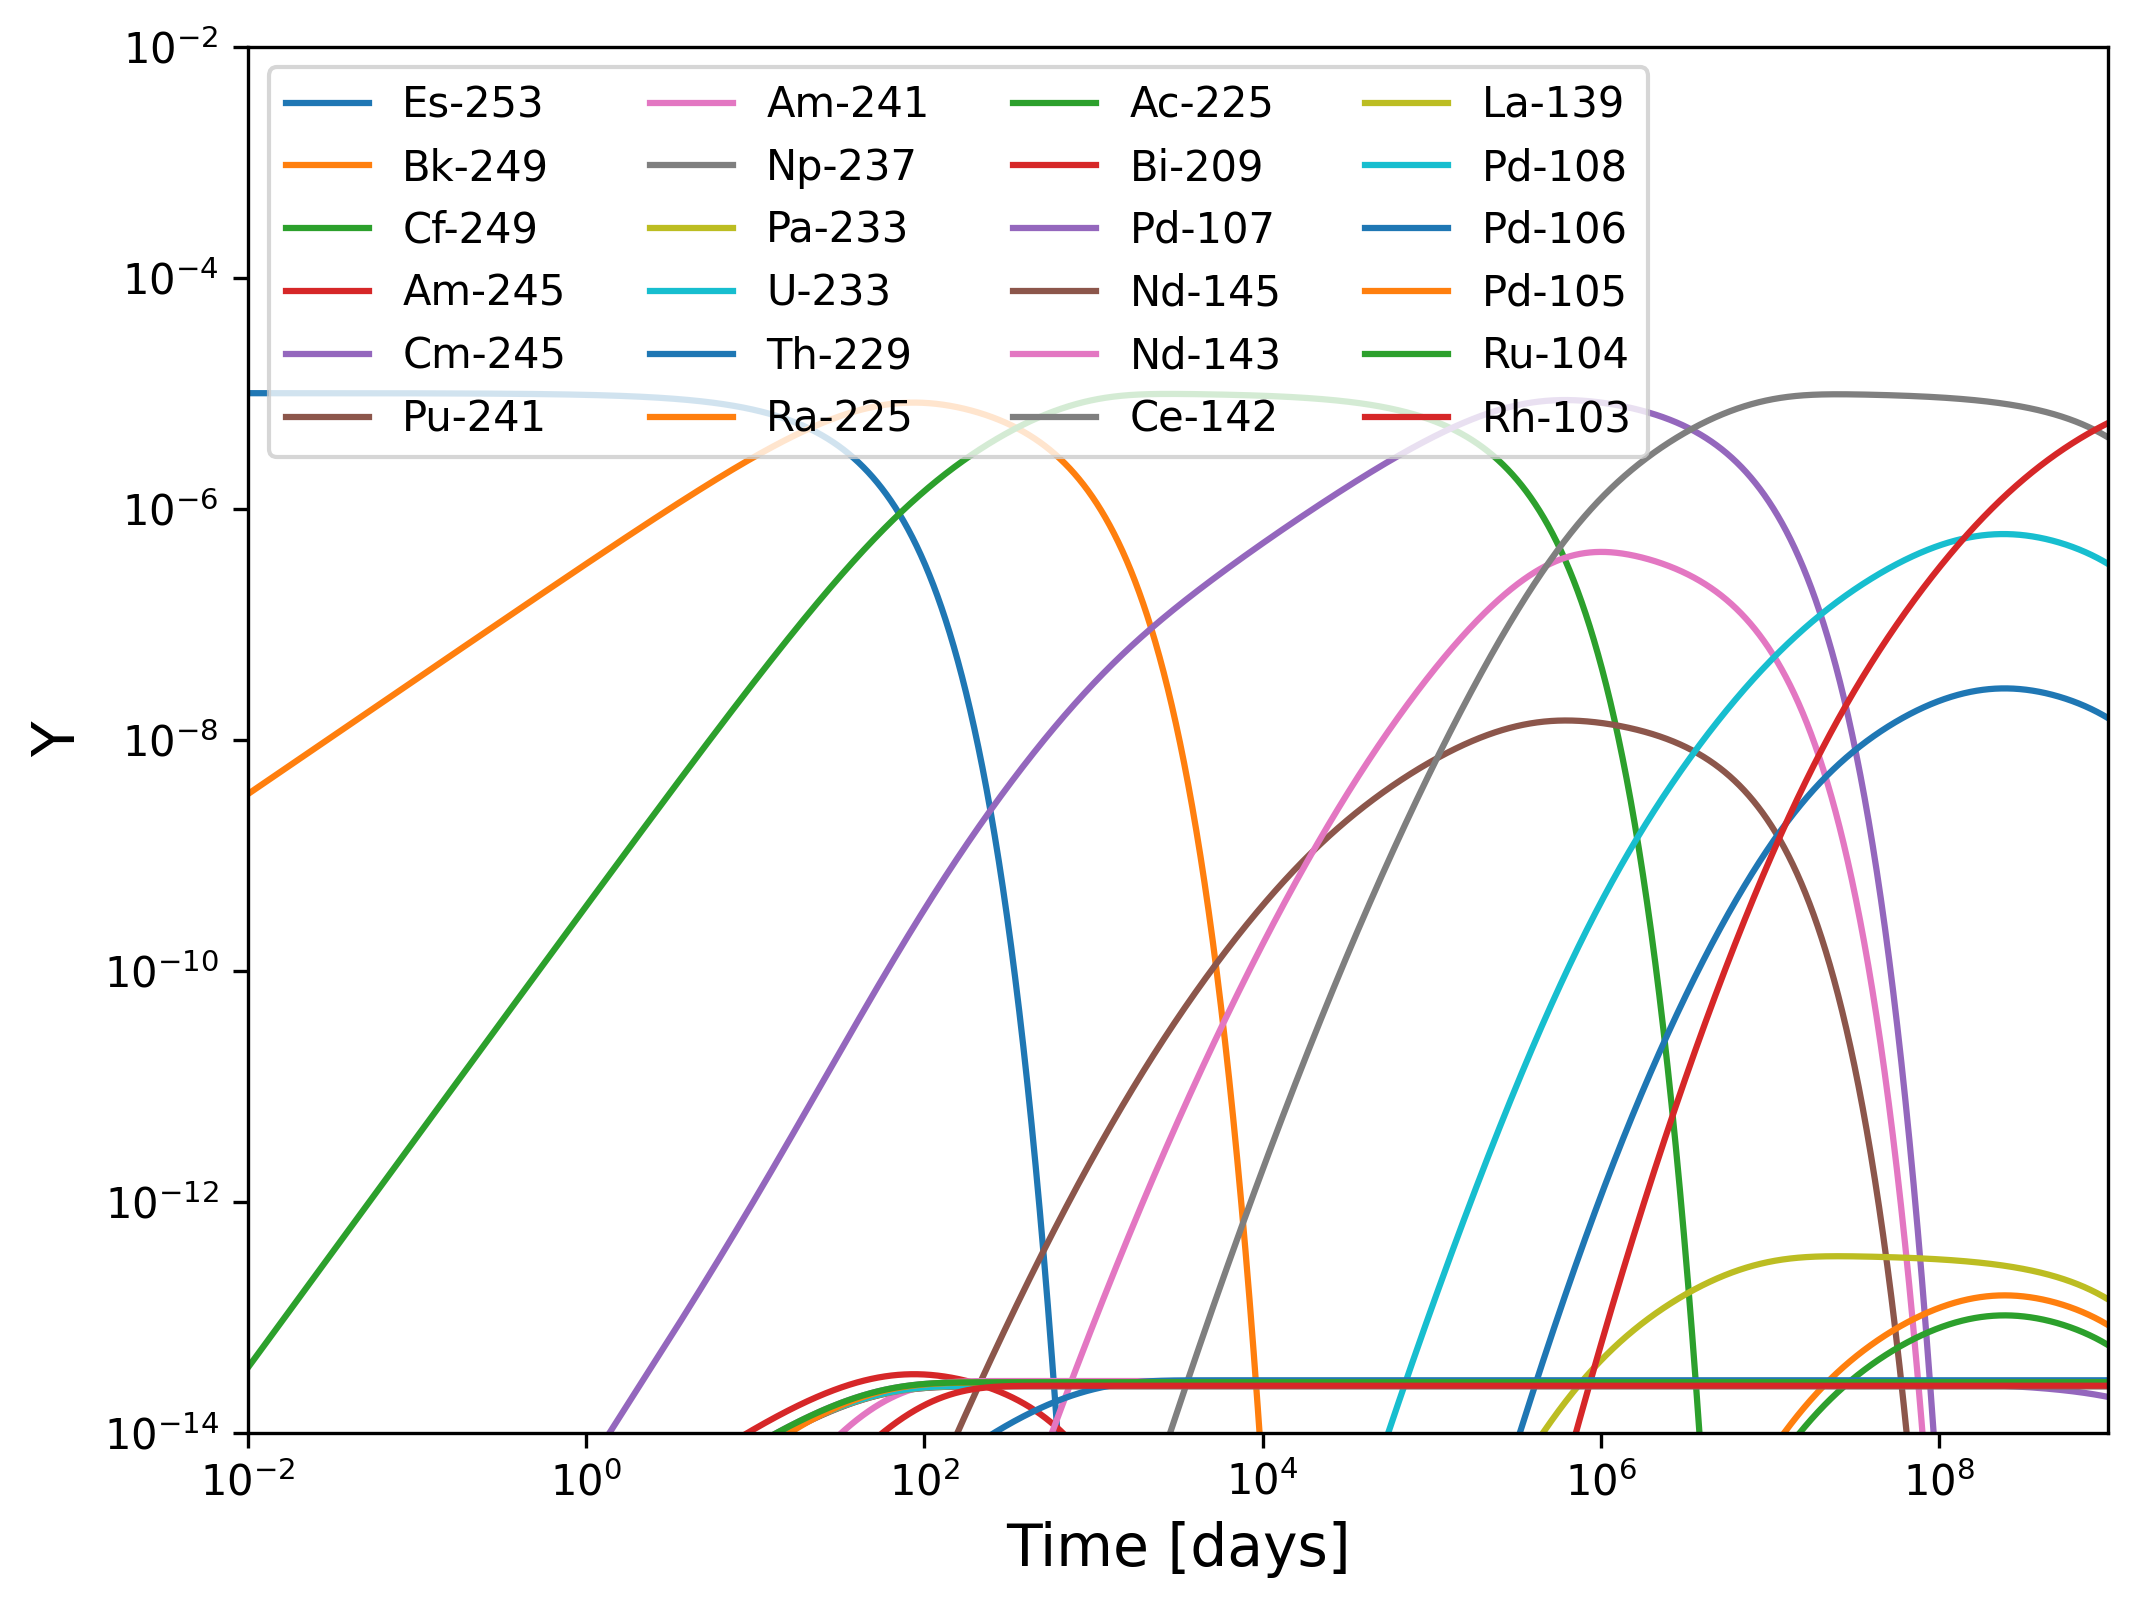

In [12]:

import sys
from pathlib import Path
sys.path.insert(0, str(Path.cwd().resolve().parent))

import numpy as np
import matplotlib.pyplot as plt
from nudca import load_decay_database, load_decay_matrix, RadioactiveDecay

decay_database = load_decay_database(data_source='ENDF-B-VIII.1_decay')
decay_matrix = load_decay_matrix(data_source='ENDF-B-VIII.1_decay')

nuc = 'Es-253'
init_Y = {nuc: 1.e-5}
radioactive_decay = RadioactiveDecay( init_Y, decay_database, decay_matrix )

times = np.geomspace(1.e-2, 1.e9, 10000) * 86400
nuclides, Y = radioactive_decay.decay_nuclide_abundances(times)


fig, ax = plt.subplots(figsize=(8, 6), dpi=300)
for i, nuclide in enumerate(nuclides):
    # if nuclide in ['Cf-252', 'As-83', 'Pb-208']:
        # ax.plot(times/86400, Y[:, i], label=f'{nuclide}')
    
    if np.any(Y[:, i] > 2.5e-14):
        ax.plot(times/86400, Y[:, i], label=f'{nuclide}')
   

ax.set_xlim(1.e-2, 1.e9)
ax.set_ylim(1e-14, 1e-2)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time [days]', fontsize=14)
ax.set_ylabel('Y', fontsize=14)

ax.legend(ncol=4)
plt.show()
fig.savefig(Path.cwd().resolve().parent.joinpath(f'plots/figures/Y_SF_{nuc}.png'), dpi=300)


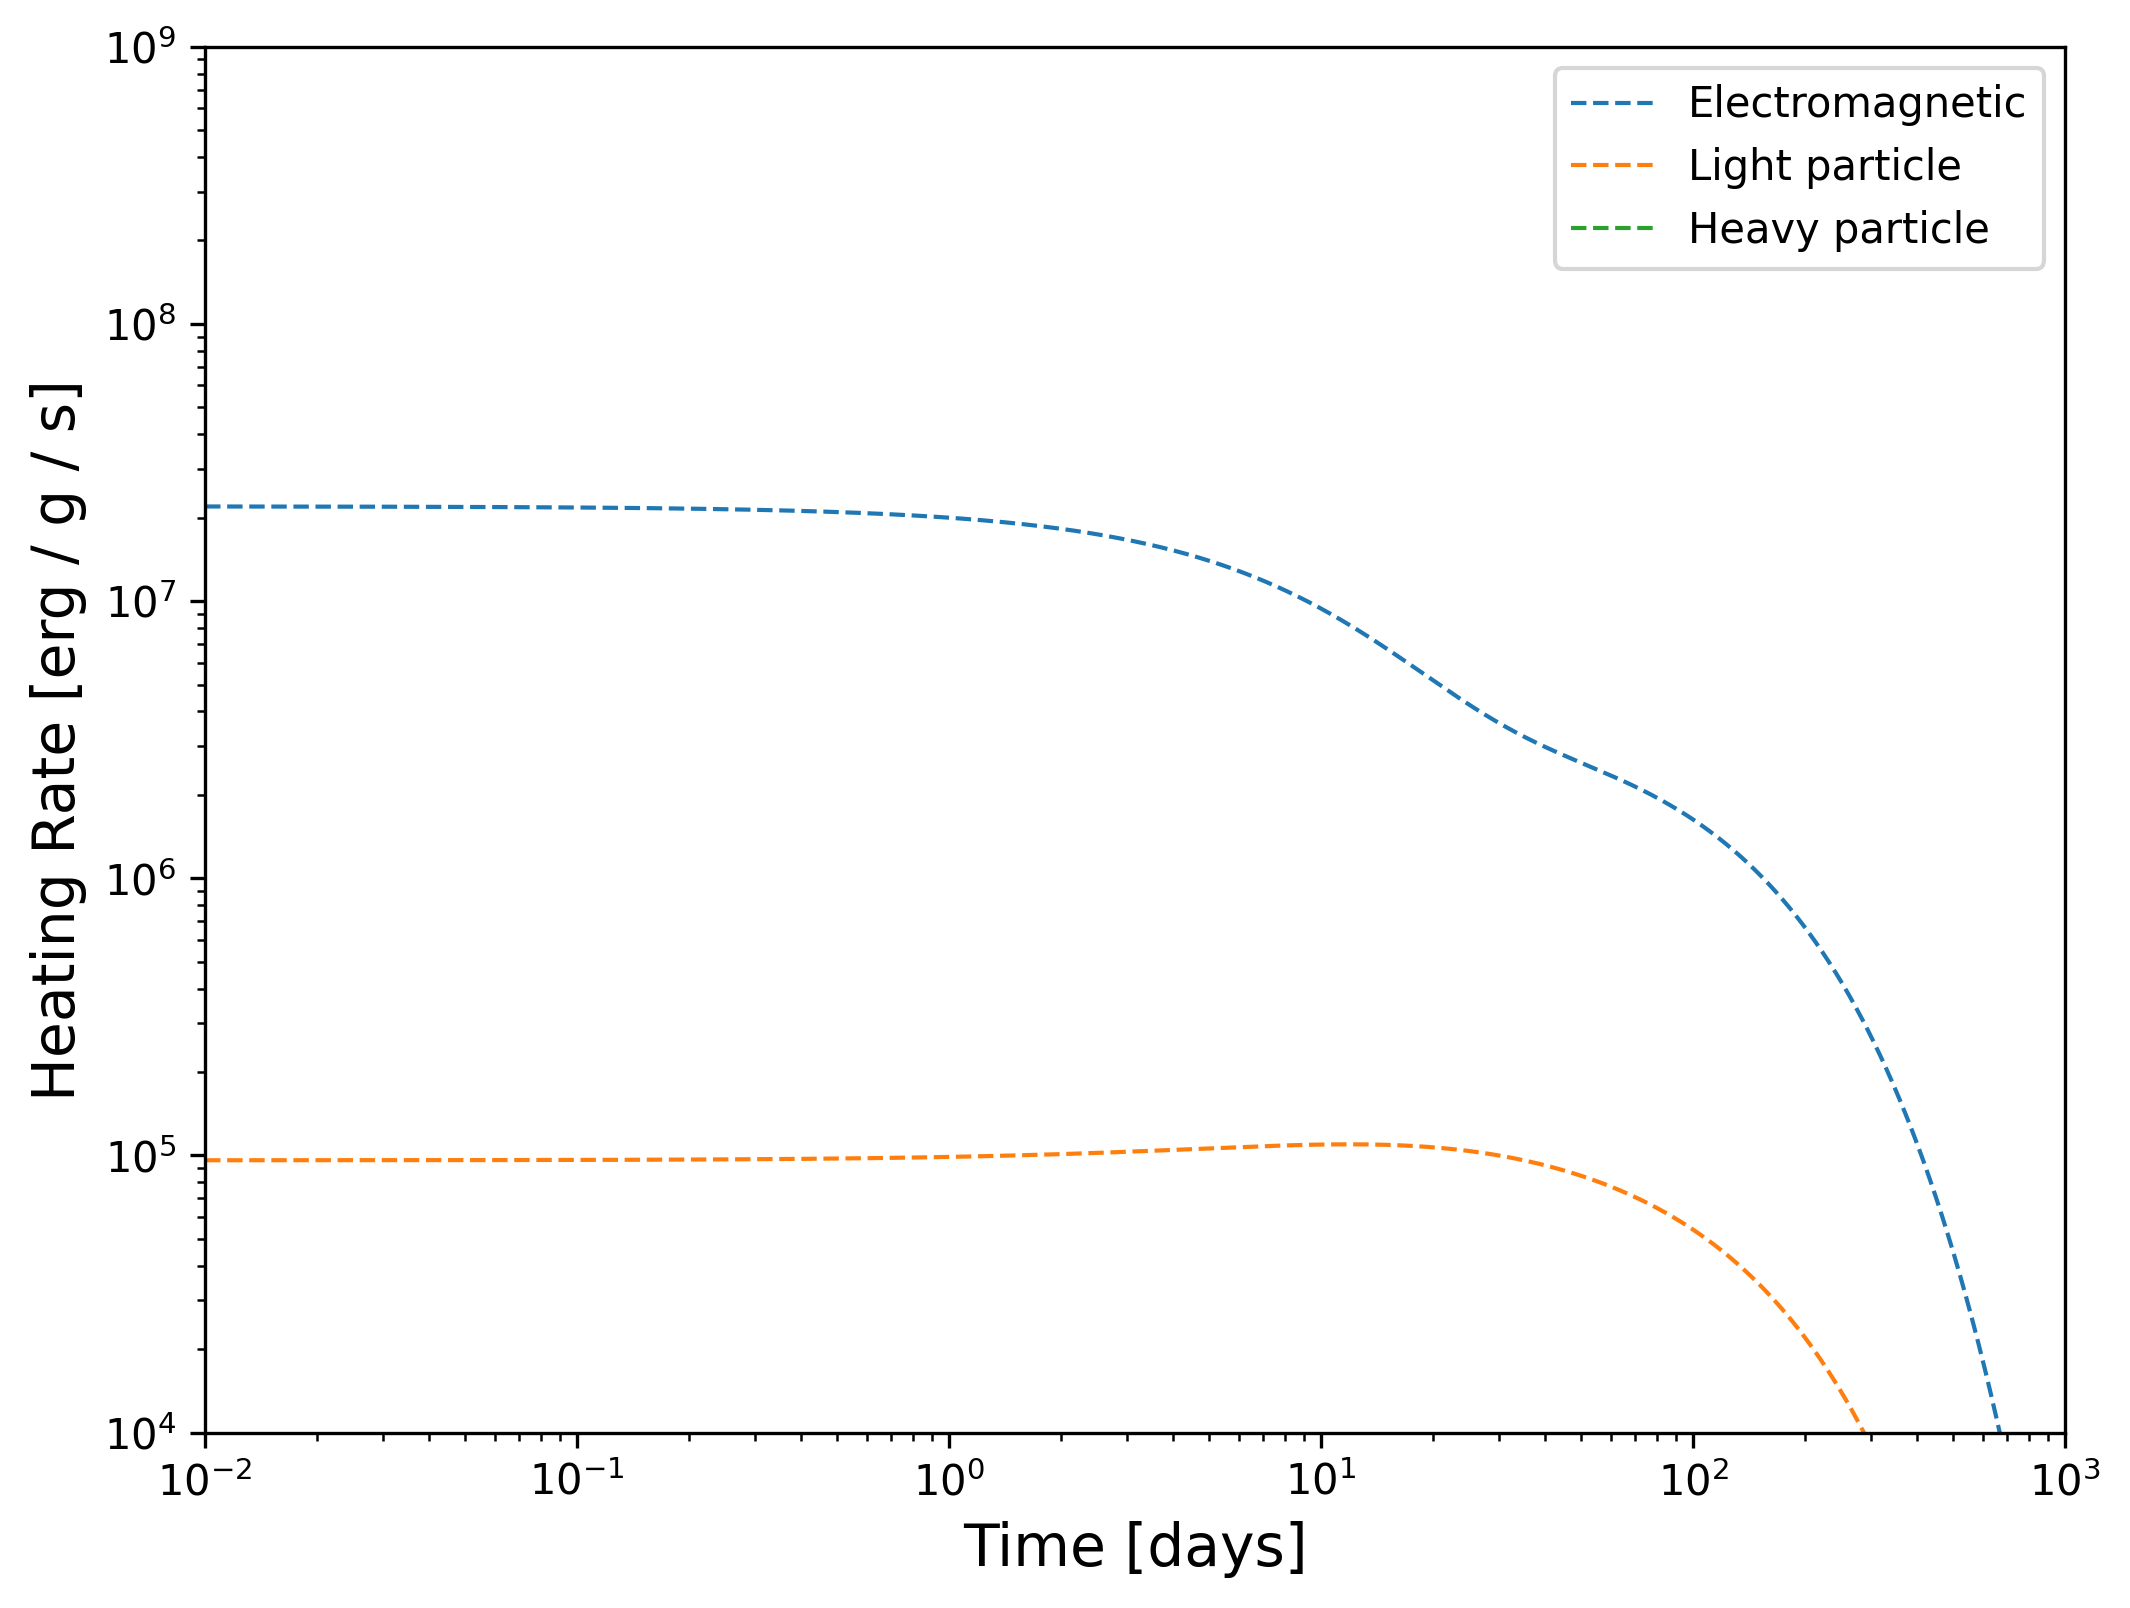

In [1]:
import sys
from pathlib import Path
sys.path.insert(0, str(Path.cwd().resolve().parent))

import numpy as np
import matplotlib.pyplot as plt
from nudca import load_decay_database, load_decay_matrix, RadioactiveDecay

decay_database = load_decay_database(data_source='ENDF-B-VIII.1_decay')
decay_matrix = load_decay_matrix(data_source='ENDF-B-VIII.1_decay')

init_Y = {'Ni56': 1.e-5, 'Co56':1.e-7, 'Fe56':1.e-9}
radioactive_decay = RadioactiveDecay( init_Y, decay_database, decay_matrix )

times = np.geomspace(1.e-2, 1.e3, 10000) * 86400
q_EM = radioactive_decay.total_decay_heating_rates(times, energy_type='EM')
q_LP = radioactive_decay.total_decay_heating_rates(times, energy_type='LP')
q_HP = radioactive_decay.total_decay_heating_rates(times, energy_type='HP')
q = radioactive_decay.total_decay_heating_rates(times)

fig, ax = plt.subplots(figsize=(8, 6), dpi=300)
ax.plot(times/86400, q_EM, ls='--', lw=1, label='Electromagnetic')
ax.plot(times/86400, q_LP, ls='--', lw=1, label='Light particle')
ax.plot(times/86400, q_HP, ls='--', lw=1,  label='Heavy particle')
# ax.plot(times/86400, q, ls='-', lw=2, color='b', label='Total')

ax.set_xlim(1.e-2, 1.e3)
ax.set_ylim(1e4, 1e9)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time [days]', fontsize=14)
ax.set_ylabel('Heating Rate [erg / g / s]', fontsize=14)

ax.legend()
plt.show()

# fig.savefig('/home/yolo/NutstoreFiles/MYDOC/WEB/NuDCA/static/images/Tutorial/HeatingRate_Ni56Decay.png', dpi=300)

# <center> Solar Abundance </center>

In [1]:
import sys
from pathlib import Path
sys.path.insert(0, str(Path.cwd().resolve().parent))

import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from nudca import load_decay_database
from nudca import load_decay_matrix
from nudca import RadioactiveDecay
from nudca.io import Inputer


decay_database = load_decay_database(data_source='ENDF-B-VIII.1_decay')
decay_matrix = load_decay_matrix(data_source='ENDF-B-VIII.1_decay')

df_solar = pd.read_excel(Path.cwd().resolve().parent.joinpath('plots/data/AbundanceY/solar_r_abundance_pattern.xlsx'))
# Y_ini_dict = filter_Y(df_solar['Z'], df_solar['A'], df_solar['Y'])
mask = (df_solar['A'] >= 85) & (df_solar['A'] <= 209)
df_solar = df_solar[mask]

inputer = Inputer(decay_database)
Y_ini_dict = inputer.to_dict(df_solar['Z'], df_solar['A'], df_solar['Y'])
radioactive_decay = RadioactiveDecay(Y_ini_dict, decay_database, decay_matrix)

decay_times = np.geomspace(1.e-2, 1.e3, 10000) * 86400

t_start = time.perf_counter()
q_EM = radioactive_decay.decay_heating_rates(decay_times, energy_type='EM')
q_LP = radioactive_decay.decay_heating_rates(decay_times, energy_type='LP')
q_HP = radioactive_decay.decay_heating_rates(decay_times, energy_type='HP')
q = radioactive_decay.total_decay_heating_rates(decay_times)
t_end = time.perf_counter()
print(f'Time taken: {t_end - t_start} seconds')

# df = pd.DataFrame({
#     't': decay_times/86400,
#     'q_EM': np.sum(q_EM, axis=1),
#     'q_LP': np.sum(q_LP, axis=1),
#     'q_HP': np.sum(q_HP, axis=1),
#     'q': q
# })
# df.to_csv(Path.cwd().resolve().parent.joinpath('plots/data/Hotokezaka/heat_nudca_beta.dat'), index=False, sep='\t')

df_hotokezaka = pd.read_csv(Path.cwd().resolve().parent.joinpath('data/heat85_209_M005_v04_v1_n45.dat'), sep='\s+', header=None)
t_hotokezaka = df_hotokezaka[0].values
q_tot_hotokezaka = df_hotokezaka[1].values
q_gamma_hotokezaka = df_hotokezaka[2].values
q_e_hotokezaka = df_hotokezaka[3].values
q_gamma_th_hotokezaka = df_hotokezaka[4].values
q_e_th_hotokezaka = df_hotokezaka[5].values


<>:47: SyntaxWarning: invalid escape sequence '\s'
<>:47: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Maxwell\AppData\Local\Temp\ipykernel_37228\1493073545.py:47: SyntaxWarning: invalid escape sequence '\s'
  df_hotokezaka = pd.read_csv(Path.cwd().resolve().parent.joinpath('data/heat85_209_M005_v04_v1_n45.dat'), sep='\s+', header=None)


Time taken: 0.8595289000004414 seconds


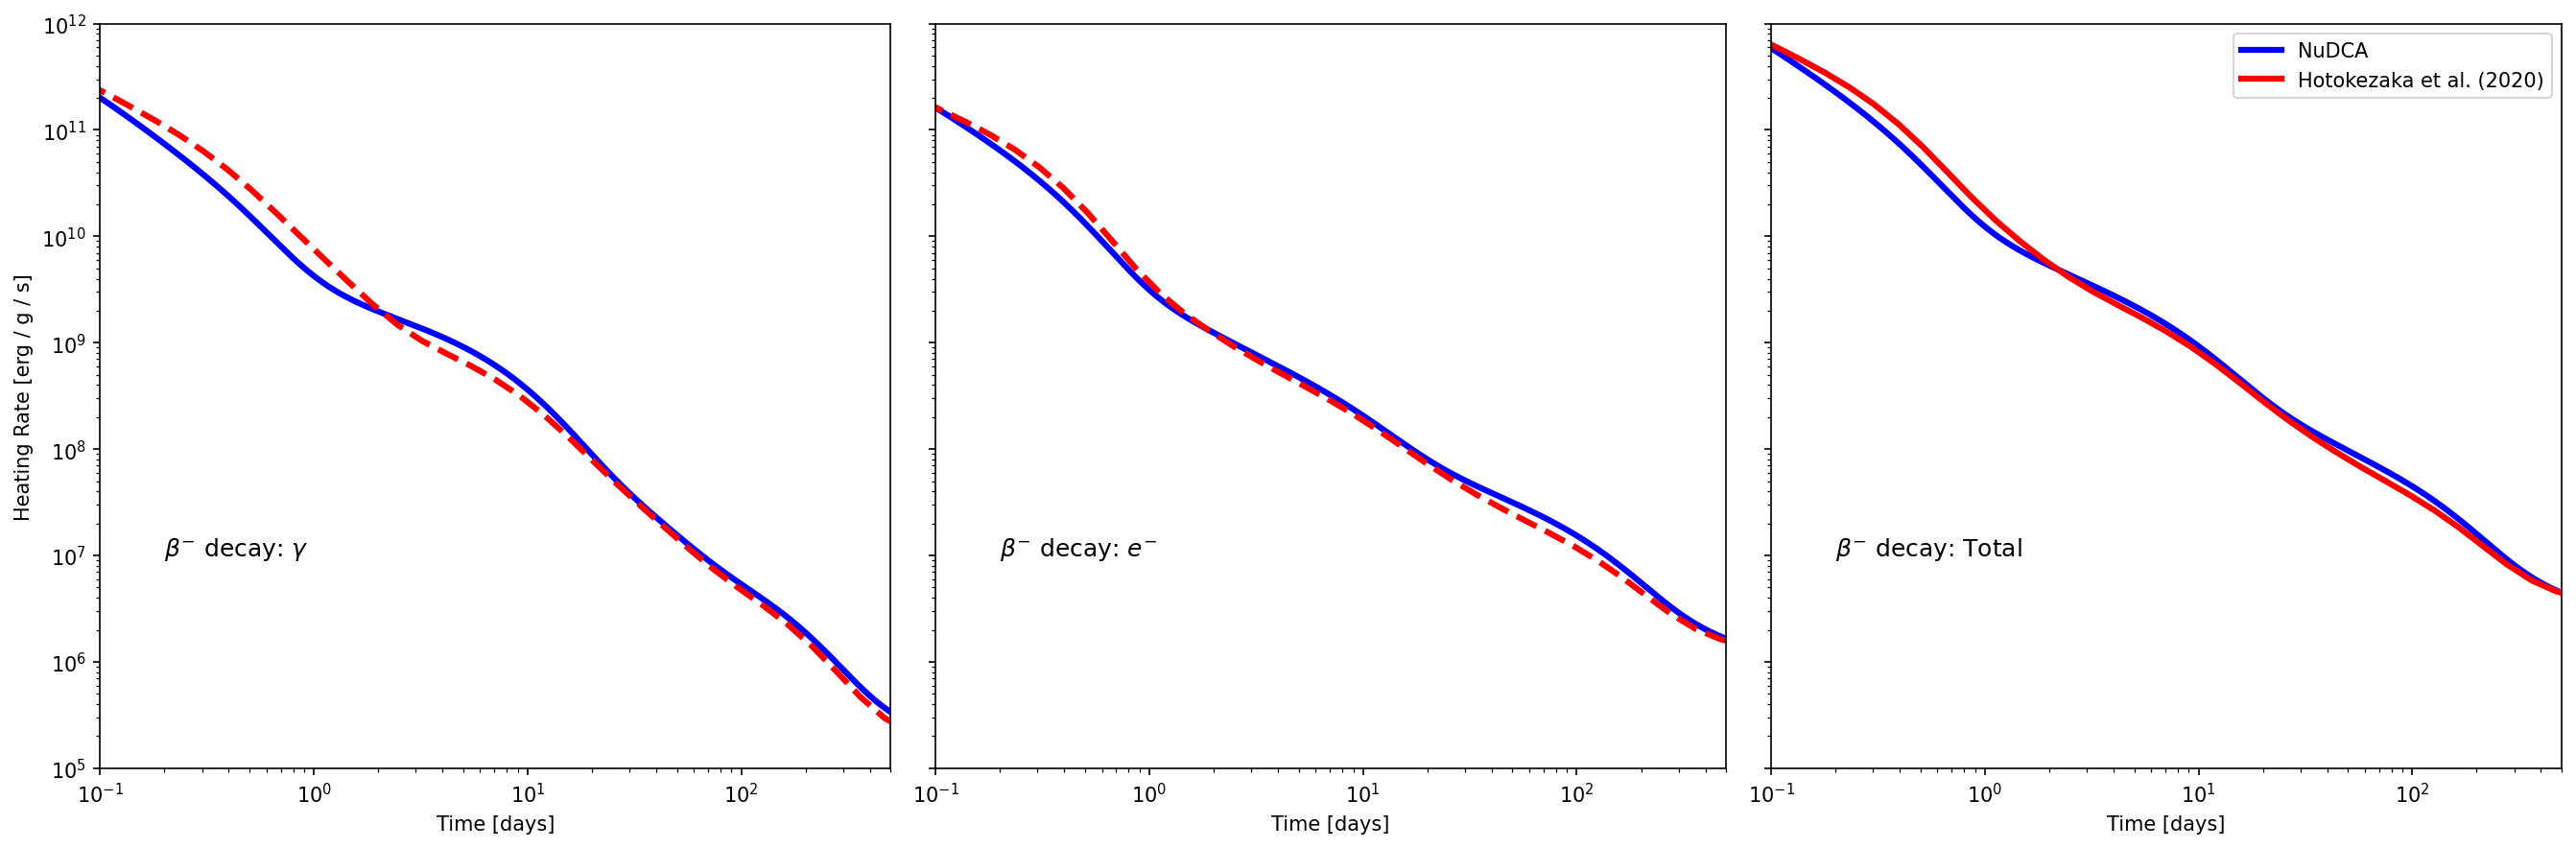

In [2]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 6), sharex=True, sharey=True, dpi=150)

axs[0].plot(decay_times/86400, np.sum(q_EM, axis=1), ls='-', lw=3, color='b')
axs[0].plot(t_hotokezaka, q_gamma_hotokezaka, ls='--', lw=3, color='r')
axs[0].set_xlim(1e-1, 5.e2)
axs[0].set_ylim(1e5, 1e12)
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_xlabel('Time [days]')
axs[0].set_ylabel('Heating Rate [erg / g / s]')

axs[1].plot(decay_times/86400, np.sum(q_LP, axis=1), ls='-', lw=3, color='b')
axs[1].plot(t_hotokezaka, q_e_hotokezaka, ls='--', lw=3, color='r')
axs[1].set_xlabel('Time [days]')

axs[2].plot(decay_times/86400, q, ls='-', lw=3, color='b', label='NuDCA')
axs[2].plot(t_hotokezaka, q_tot_hotokezaka, ls='-', lw=3, color='r', label='Hotokezaka et al. (2020)')
axs[2].set_xlabel('Time [days]')

axs[0].text(2.e-1, 1.e7, r'$\beta^{-}$ decay: $\gamma$', fontsize=12)
axs[1].text(2.e-1, 1.e7, r'$\beta^{-}$ decay: $e^{-}$', fontsize=12)
axs[2].text(2.e-1, 1.e7, r'$\beta^{-}$ decay: Total', fontsize=12)

axs[2].legend()
plt.tight_layout()
plt.show()

In [1]:
import sys
from pathlib import Path
sys.path.insert(0, str(Path.cwd().resolve().parent))

import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from nudca import load_decay_database
from nudca import load_decay_matrix
from nudca import RadioactiveDecay
from nudca.io import Inputer


decay_database = load_decay_database(data_source='ENDF-B-VIII.1_decay')
decay_matrix = load_decay_matrix(data_source='ENDF-B-VIII.1_decay')

df_solar = pd.read_excel(Path.cwd().resolve().parent.joinpath('plots/data/solar_Sneden2008_Y.xlsx'))

Z = df_solar['Z'].values - 3
A = df_solar['A'].values
Y = df_solar['Y_r'].values

mask = (A >= 85) & (A <= 209)
Z = Z[mask]
A = A[mask]
Y = Y[mask]

X = []
for a, y in zip(A, Y):
    x = a * y
    X.append(x)
Y = np.array(X) / np.sum(X) / A

inputer = Inputer(decay_database)
Y_ini_dict = inputer.filter_Y(Z, A, Y)
radioactive_decay = RadioactiveDecay(Y_ini_dict, decay_database, decay_matrix)

decay_times = np.geomspace(1.e-2, 5.e2, 10000) * 86400

t_start = time.perf_counter()
q_EM = radioactive_decay.total_decay_heating_rates(decay_times, energy_type='EM')
q_LP = radioactive_decay.total_decay_heating_rates(decay_times, energy_type='LP')
q_HP = radioactive_decay.total_decay_heating_rates(decay_times, energy_type='HP')
q = radioactive_decay.total_decay_heating_rates(decay_times)
t_end = time.perf_counter()
print(f'Time taken: {t_end - t_start} seconds')

df_hotokezaka = pd.read_csv(Path.cwd().resolve().parent.joinpath('plots/data/heat_beta_Sneden2008.dat'), sep='\s+', header=None)
t_hotokezaka = df_hotokezaka[0].values
q_tot_hotokezaka = df_hotokezaka[1].values
q_gamma_hotokezaka = df_hotokezaka[2].values
q_e_hotokezaka = df_hotokezaka[3].values
q_gamma_th_hotokezaka = df_hotokezaka[4].values
q_e_th_hotokezaka = df_hotokezaka[5].values


df_hotokezaka2 = pd.read_csv(Path.cwd().resolve().parent.joinpath('plots/data/heat85_209_M005_v04_v1_n45.dat'), sep='\s+', header=None)
t_hotokezaka2 = df_hotokezaka2[0].values
q_tot_hotokezaka2 = df_hotokezaka2[1].values
q_gamma_hotokezaka2 = df_hotokezaka2[2].values
q_e_hotokezaka2 = df_hotokezaka2[3].values
q_gamma_th_hotokezaka2 = df_hotokezaka2[4].values
q_e_th_hotokezaka2 = df_hotokezaka2[5].values




<>:51: SyntaxWarning: invalid escape sequence '\s'
<>:60: SyntaxWarning: invalid escape sequence '\s'
<>:51: SyntaxWarning: invalid escape sequence '\s'
<>:60: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Maxwell\AppData\Local\Temp\ipykernel_7028\1944844033.py:51: SyntaxWarning: invalid escape sequence '\s'
  df_hotokezaka = pd.read_csv(Path.cwd().resolve().parent.joinpath('plots/data/heat_beta_Sneden2008.dat'), sep='\s+', header=None)
C:\Users\Maxwell\AppData\Local\Temp\ipykernel_7028\1944844033.py:60: SyntaxWarning: invalid escape sequence '\s'
  df_hotokezaka2 = pd.read_csv(Path.cwd().resolve().parent.joinpath('plots/data/heat85_209_M005_v04_v1_n45.dat'), sep='\s+', header=None)


Time taken: 0.607215100000758 seconds


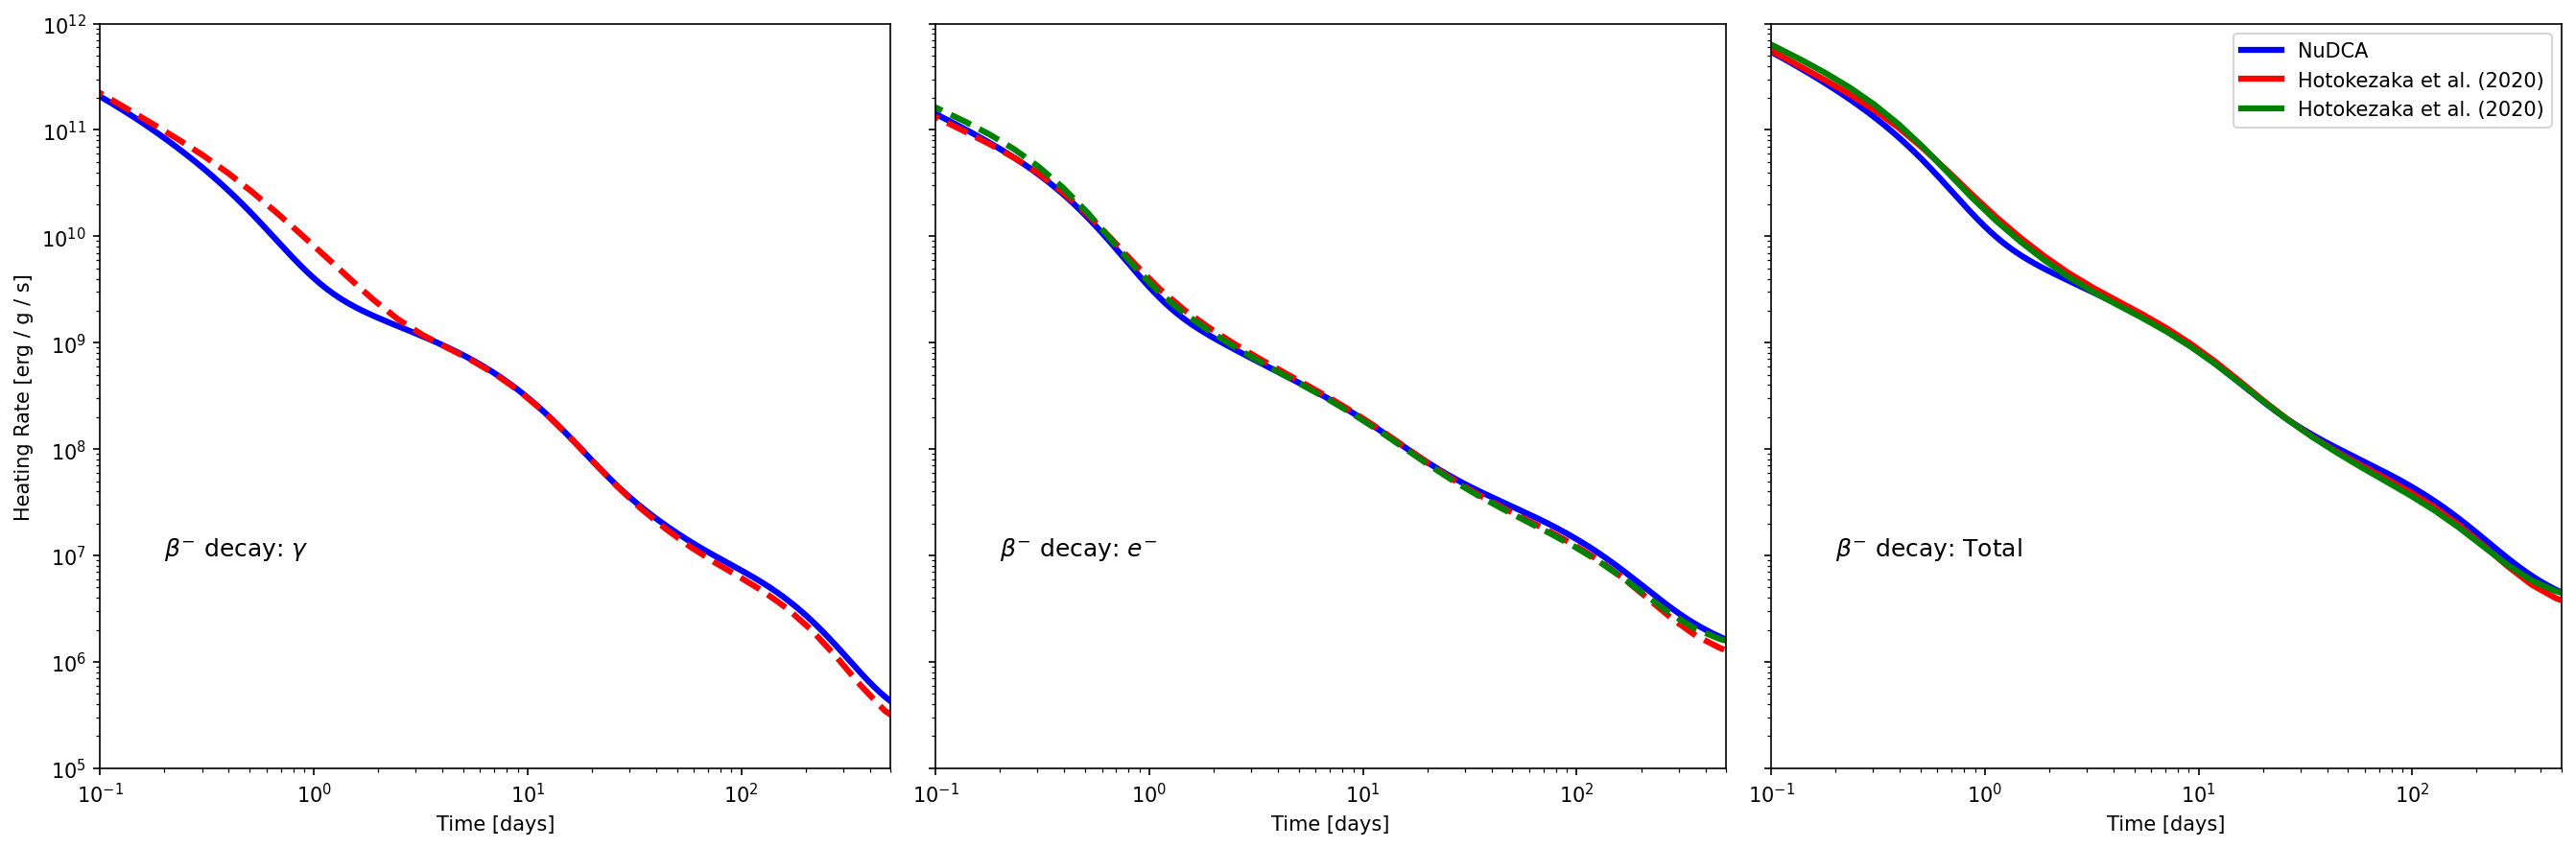

In [2]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 6), sharex=True, sharey=True, dpi=150)

axs[0].plot(decay_times/86400, q_EM, ls='-', lw=3, color='b')
axs[0].plot(t_hotokezaka, q_gamma_hotokezaka, ls='--', lw=3, color='r')
axs[0].set_xlim(1e-1, 5.e2)
axs[0].set_ylim(1e5, 1e12)
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_xlabel('Time [days]')
axs[0].set_ylabel('Heating Rate [erg / g / s]')

axs[1].plot(decay_times/86400, q_LP, ls='-', lw=3, color='b')
axs[1].plot(t_hotokezaka, q_e_hotokezaka, ls='--', lw=3, color='r')
axs[1].plot(t_hotokezaka2, q_e_hotokezaka2, ls='--', lw=3, color='g')
axs[1].set_xlabel('Time [days]')

axs[2].plot(decay_times/86400, q, ls='-', lw=3, color='b', label='NuDCA')
axs[2].plot(t_hotokezaka, q_tot_hotokezaka, ls='-', lw=3, color='r', label='Hotokezaka et al. (2020)')
axs[2].plot(t_hotokezaka2, q_tot_hotokezaka2, ls='-', lw=3, color='g', label='Hotokezaka et al. (2020)')
axs[2].set_xlabel('Time [days]')

axs[0].text(2.e-1, 1.e7, r'$\beta^{-}$ decay: $\gamma$', fontsize=12)
axs[1].text(2.e-1, 1.e7, r'$\beta^{-}$ decay: $e^{-}$', fontsize=12)
axs[2].text(2.e-1, 1.e7, r'$\beta^{-}$ decay: Total', fontsize=12)

axs[2].legend()
plt.tight_layout()
plt.show()

In [1]:
import sys
from pathlib import Path
sys.path.insert(0, str(Path.cwd().resolve().parent))

import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from nudca import load_decay_database
from nudca import load_decay_matrix
from nudca import RadioactiveDecay
from nudca.io import Inputer, AbundanceEstimator


decay_database = load_decay_database(data_source='ENDF-B-VIII.1_decay')
decay_matrix = load_decay_matrix(data_source='ENDF-B-VIII.1_decay')

Z, A, Y = np.loadtxt(Path.cwd().resolve().parent.joinpath('plots/data/Hotokezaka/solar_r_abundance_pattern.dat'), comments='#', unpack=True)

mask = (A >= 85)
Z = Z[mask]
A = A[mask]
Y = Y[mask]

X = []
for a, y in zip(A, Y):
    x = a * y
    X.append(x)
Y = np.array(X) / np.sum(X) / A

inputer = Inputer(decay_database)
Y_ini_0 = AbundanceEstimator(decay_database).initial_abundances_rProcess(inputer.filter_Y(Z, A, Y))  

In [2]:

radioactive_decay = RadioactiveDecay(Y_ini_0, decay_database, decay_matrix)

decay_times = np.geomspace(1.e-2, 5.e2, 10000) * 86400

t_start = time.perf_counter()
q_EM = radioactive_decay.decay_heating_rates(decay_times, energy_type='EM')
q_LP = radioactive_decay.decay_heating_rates(decay_times, energy_type='LP')
q_HP = radioactive_decay.decay_heating_rates(decay_times, energy_type='HP')
q = radioactive_decay.total_decay_heating_rates(decay_times)
t_end = time.perf_counter()
print(f'Time taken: {t_end - t_start} seconds')

beta_hotokezaka = np.loadtxt(Path.cwd().resolve().parent.joinpath('plots/data/Hotokezaka/heat_beta.dat'), comments='#', unpack=True)

t_hotokezaka = beta_hotokezaka[0]
q_tot_hotokezaka = beta_hotokezaka[1]
q_gamma_hotokezaka = beta_hotokezaka[2]
q_e_hotokezaka = beta_hotokezaka[3]
q_gamma_th_hotokezaka = beta_hotokezaka[4]
q_e_th_hotokezaka = beta_hotokezaka[5]

Time taken: 1.9273958999983734 seconds


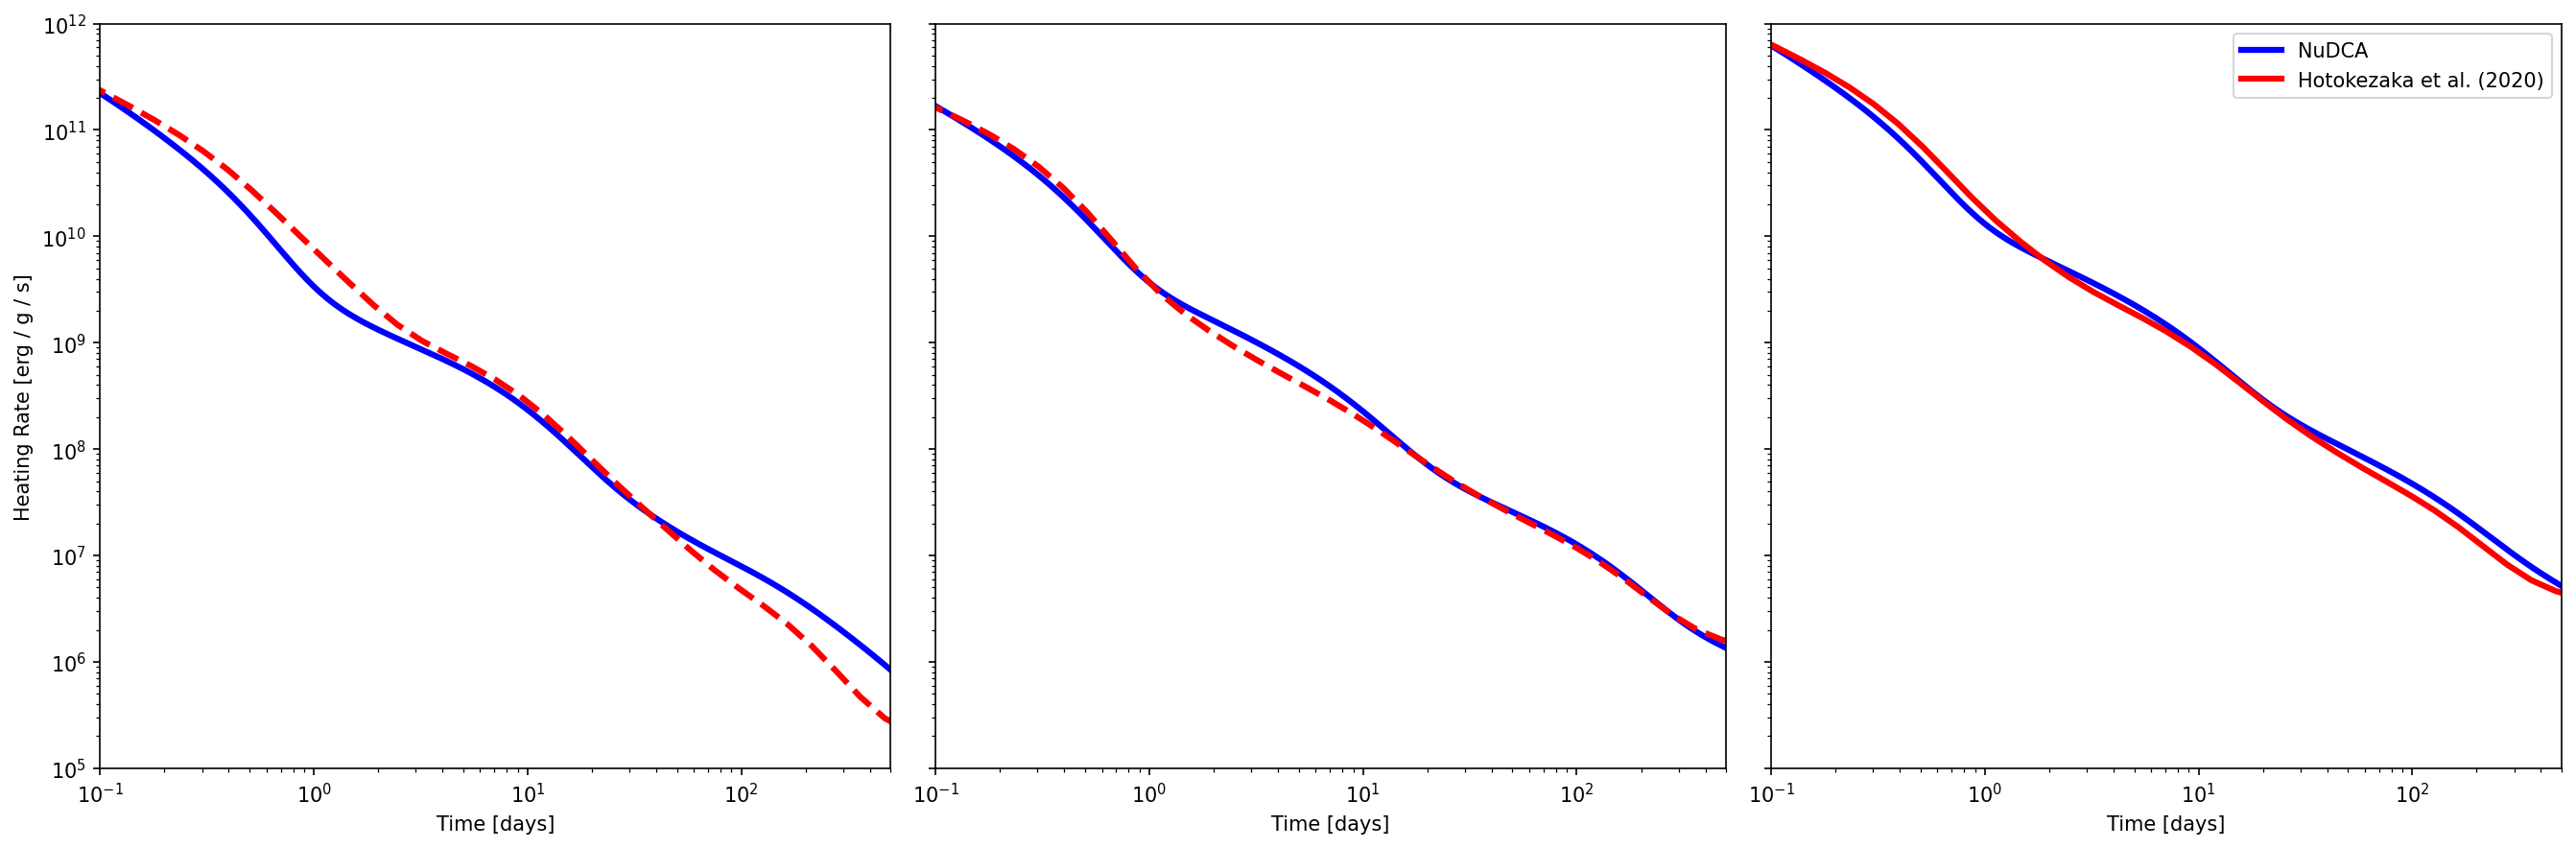

In [3]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 6), sharex=True, sharey=True, dpi=150)

axs[0].plot(decay_times/86400, np.sum(q_EM, axis=1), ls='-', lw=3, color='b')
axs[0].plot(t_hotokezaka, q_gamma_hotokezaka, ls='--', lw=3, color='r')
axs[0].set_xlim(1e-1, 5.e2)
axs[0].set_ylim(1e5, 1e12)
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_xlabel('Time [days]')
axs[0].set_ylabel('Heating Rate [erg / g / s]')

axs[1].plot(decay_times/86400, np.sum(q_LP, axis=1), ls='-', lw=3, color='b')
axs[1].plot(t_hotokezaka, q_e_hotokezaka, ls='--', lw=3, color='r')
axs[1].set_xlabel('Time [days]')

axs[2].plot(decay_times/86400, q, ls='-', lw=3, color='b', label='NuDCA')
axs[2].plot(t_hotokezaka, q_tot_hotokezaka, ls='-', lw=3, color='r', label='Hotokezaka et al. (2020)')
axs[2].set_xlabel('Time [days]')

# axs[0].text(2.e-1, 1.e7, r'$\beta^{-}$ decay: $\gamma$', fontsize=12)
# axs[1].text(2.e-1, 1.e7, r'$\beta^{-}$ decay: $e^{-}$', fontsize=12)
# axs[2].text(2.e-1, 1.e7, r'$\beta^{-}$ decay: Total', fontsize=12)

axs[2].legend()
plt.tight_layout()
plt.show()